In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.4f' % x)
import seaborn as sns #画图包
sns.set_context("paper", font_scale=1.3) 
sns.set_style('white')
import warnings
warnings.filterwarnings('ignore')
from time import time
import matplotlib.ticker as tkr
from scipy import stats #计算工具
from statsmodels.tsa.stattools import adfuller
from sklearn import preprocessing
from statsmodels.tsa.stattools import pacf
%matplotlib inline
import math
import keras
from keras.models import Sequential
from keras.layers import Dense #连接层
from keras.layers import LSTM
from keras.layers import GRU
from keras.layers import Dropout 
from keras.layers import Bidirectional
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler #归一到[0,1]
from sklearn.metrics import mean_squared_error #MSE
from sklearn.metrics import mean_absolute_error #MAE
from keras.callbacks import EarlyStopping 
import os.path #获取文件属性
from os import path

import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator
from sklearn import metrics
def mape(y_true, y_pred):
    return np.mean(np.abs((y_pred - y_true) / y_true)) * 100

In [2]:
def result():
    print('训练MAE:', mean_absolute_error(Y_train[0], train_predict[:,0]))
    print('训练RMSE:',np.sqrt(mean_squared_error(Y_train[0], train_predict[:,0])))
    print('训练MAPE：',mape(Y_train[0], train_predict[:,0]))
    print('测试MAE', mean_absolute_error(Y_test[0], test_predict[:,0]))
    print('测试RMSE:',np.sqrt(mean_squared_error(Y_test[0], test_predict[:,0])))
    print('测试MAPE：',mape(Y_test[0], test_predict[:,0]))
    return

In [3]:
def resume():
    df=pd.read_csv('dataset.csv')
    return df

In [6]:
dataset = df.Global_active_power.values #数据值
# show=dataset
dataset = dataset.astype('float32') #格式float32
dataset = np.reshape(dataset, (-1, 1)) #重置到（-1,1）
# show=dataset
scaler = MinMaxScaler(feature_range=(0, 1))
show=scaler
dataset = scaler.fit_transform(dataset) #归一化到（0,1）
show=dataset
train_size = int(len(dataset) * 0.80) #训练集0.8
test_size = len(dataset) - train_size #测试集0.2
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [8]:
def create_dataset(dataset, look_back=1): 
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0] #训练30
        X.append(a)
        Y.append(dataset[i + look_back, 0]) #Y是第31个
#         print(dataset[i + look_back, 0])
    return np.array(X), np.array(Y) #numpy类型变换


In [10]:
#GRU1

look_back = 30 
X_train, Y_train = create_dataset(train, look_back)

X_test, Y_test = create_dataset(test, look_back)
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))


model = Sequential() #创建模型序列对象
model.add(GRU(100,input_shape=(X_train.shape[1], X_train.shape[2]))) 
#100个神经元，输入X_tran.shape[1]个维度，X_train.shape[2]个特征，可以多层LSTM
model.add(Dropout(0.2))  

Adam=tf.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8, decay=0.0, amsgrad=False)

model.add(Dense(1)) #全连接层

model.compile( metrics= 'acc',loss='mean_squared_error', optimizer=Adam) #损失函数用MSE 优化器adam

history = model.fit(X_train, Y_train, epochs=15, batch_size=70, validation_data=(X_test, Y_test), 
                    callbacks=[EarlyStopping(monitor='val_loss', patience=10)], verbose=1, shuffle=False)

#训练15轮，每批送进去70个数据
# Training Phase
model.summary() 

train_predict = model.predict(X_train)
test_predict = model.predict(X_test)
train_predict = scaler.inverse_transform(train_predict)
Y_train = scaler.inverse_transform([Y_train])
test_predict = scaler.inverse_transform(test_predict)
Y_test = scaler.inverse_transform([Y_test])

Epoch 1/15
23717/23717 [==============================] - 100s 4ms/step - loss: 8.0084e-04 - acc: 5.4211e-06 - val_loss: 4.6872e-04 - val_acc: 0.0000e+00
Epoch 2/15
23717/23717 [==============================] - 95s 4ms/step - loss: 6.7453e-04 - acc: 5.4211e-06 - val_loss: 4.1858e-04 - val_acc: 0.0000e+00
Epoch 3/15
23717/23717 [==============================] - 95s 4ms/step - loss: 6.5691e-04 - acc: 5.4211e-06 - val_loss: 3.9624e-04 - val_acc: 0.0000e+00
Epoch 4/15
23717/23717 [==============================] - 203s 9ms/step - loss: 6.4646e-04 - acc: 5.4211e-06 - val_loss: 3.8599e-04 - val_acc: 0.0000e+00
Epoch 5/15
23717/23717 [==============================] - 190s 8ms/step - loss: 6.4002e-04 - acc: 5.4211e-06 - val_loss: 3.8434e-04 - val_acc: 0.0000e+00
Epoch 6/15
23717/23717 [==============================] - 119s 5ms/step - loss: 6.3427e-04 - acc: 5.4211e-06 - val_loss: 3.8565e-04 - val_acc: 0.0000e+00
Epoch 7/15
23717/23717 [==============================] - 120s 5ms/step - loss

In [12]:
print('训练MAE:', mean_absolute_error(Y_train[0], train_predict[:,0]))
print('训练RMSE:',np.sqrt(mean_squared_error(Y_train[0], train_predict[:,0])))
print('训练MAPE：',mape(Y_train[0], train_predict[:,0]))
print('测试MAE', mean_absolute_error(Y_test[0], test_predict[:,0]))
print('测试RMSE:',np.sqrt(mean_squared_error(Y_test[0], test_predict[:,0])))
print('测试MAPE：',mape(Y_test[0], test_predict[:,0]))

训练MAE: 0.1004365744194976
训练RMSE: 0.26550603987922444
训练MAPE： 11.908204767341237
测试MAE 0.08269157102879492
测试RMSE: 0.2156376464715579
测试MAPE： 9.809131828530498


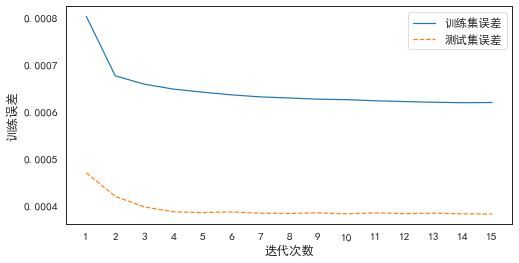

In [13]:
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(8,4))
# plt.xlim(1,15)
x_values=list(range(15))
x_major_locator=MultipleLocator(1)
ax=plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
plt.plot([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],history.history['loss'], label='训练集误差')
plt.plot([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],history.history['val_loss'], label='测试集误差',linestyle='--')
# plt.title('训练误差')
plt.ylabel('训练误差')
plt.xlabel('迭代次数')
plt.legend(loc='upper right')
# plt.savefig('./0*0001第一次.png')
plt.show();


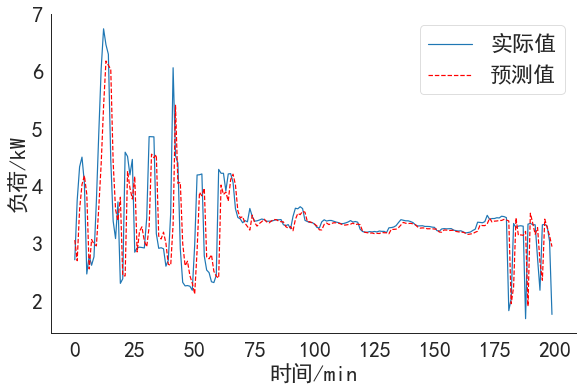

In [15]:
aa=[x for x in range(200)]
fig=plt.figure(figsize=(8,5))
plt.plot(aa, Y_train[0][:200], label="实际值")
plt.plot(aa, train_predict[:,0][:200], 'r', label="预测值",linestyle='--')
plt.tight_layout()
sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.ylabel('负荷/kW', size=22)
plt.xlabel('时间/min', size=22)
plt.xticks(size=22)
plt.yticks(size=22)
plt.legend(fontsize=22)
# plt.savefig('./训练集predict.png',bbox_inches = 'tight')
plt.show();

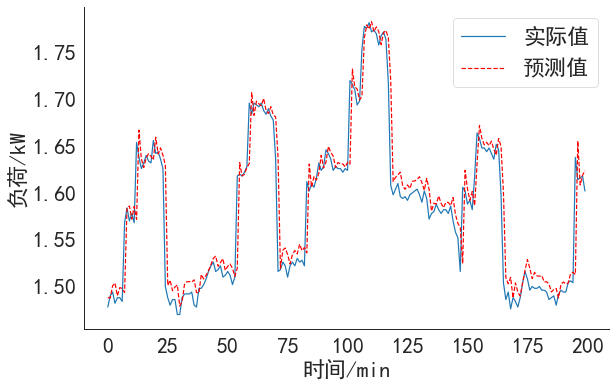

In [17]:
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
aa=[x for x in range(200)]
fig=plt.figure(figsize=(8,5))
plt.plot(aa, Y_test[0][200:400], label="实际值")
plt.plot(aa, test_predict[:,0][200:400], 'r', label="预测值",linestyle='--')
plt.tight_layout()
sns.despine(top=True)
plt.subplots_adjust(left=0.07)
fig.suptitle('', fontsize=30)
plt.ylabel('负荷/kW', size=22)
plt.xlabel('时间/min', size=22)
plt.xticks(size=22)
plt.yticks(size=22)
plt.legend(fontsize=22)
#plt.savefig('./测试集predict.png',bbox_inches = 'tight')
plt.show();
